# Analysis

In [1]:
from src import data
import pandas as pd, numpy as np, polars as pl
from nltk import word_tokenize, sent_tokenize
import re

data_directory = '../../../../data/datasets/05_vocabs'

datasets = data.dict_from_directory(data_directory, type='pandas')


# df.abstract = df.abstract.str.slice(stop=1700)

In [2]:
df = datasets['adhd']

# Tokenize the abstracts
tokens = [word_tokenize(x) if pd.notnull(x) else [] for x in df.abstract]

# Regular expression to filter out non-alphabetic characters
expression = '[^ A-Za-z]+'

# Filter out elements by the expression for each list within tokens
words = [[word for word in token if not re.match(expression, word)] for token in tokens]

word_lengths = [len(x) for x in words]

#word_lengths = [len(x) for x in tokens if len(x) > 0 else 0] 

In [3]:
distributions = pd.DataFrame(columns=['dataset', 'type', 'n', 'mean', 'std', 'min', '5%', '25%', '50%', '75%', '95%', '99%', 'max'])
abstract_lens = {}
word_lens = {}

for subject, data in datasets.items():
    # abstract length
    n = len(data)
    abstract_lengths = data.abstract.str.len()
    abstract_lens[subject] = abstract_lengths
    
    mean = int(abstract_lengths.mean())
    std = int(abstract_lengths.std())
    min = int(abstract_lengths.min())
    q5 = int(abstract_lengths.quantile(0.05))
    q25 = int(abstract_lengths.quantile(0.25))
    q50 = int(abstract_lengths.quantile(0.50))
    q75 = int(abstract_lengths.quantile(0.75))
    q95 = int(abstract_lengths.quantile(0.95))
    q99 = int(abstract_lengths.quantile(0.99))
    max = int(abstract_lengths.max())
    
    summary = pd.Series([subject, 'length', n, mean, std, min, q5, q25, q50, q75, q95, q99, max], index=distributions.columns)
    distributions = pd.concat([distributions, summary.to_frame().T])

    # word counts
    n = len(data)
    # Tokenize the abstracts
    tokens = [word_tokenize(x) if pd.notnull(x) else [] for x in data.abstract]

    # Regular expression to filter out non-alphabetic characters
    #expression = '[^ A-Za-z]+'

    # Filter out elements by the expression for each list within tokens
    #words = [[word for word in token if not re.match(expression, word)] for token in tokens]
    
    word_lengths = pd.Series([len(x) for x in tokens]) # EXCHANGE TOKENS W WORDS
    word_lens[subject] = word_lengths

    mean = int(word_lengths.mean())
    std = int(word_lengths.std())
    min = int(word_lengths.min())
    q5 = int(word_lengths.quantile(0.05))
    q25 = int(word_lengths.quantile(0.25))
    q50 = int(word_lengths.quantile(0.50))
    q75 = int(word_lengths.quantile(0.75))
    q95 = int(word_lengths.quantile(0.95))
    q99 = int(word_lengths.quantile(0.99))
    max = int(word_lengths.max())
    
    summary = pd.Series([subject, 'word_count', n, mean, std, min, q5, q25, q50, q75, q95, q99, max], index=distributions.columns)

    distributions = pd.concat([distributions, summary.to_frame().T])


In [4]:
characters = distributions[distributions['type'] == 'length']
characters

,dataset,type,n,mean,std,min,5%,25%,50%,75%,95%,99%,max
0,adhd,length,851,1689,1936,109,729,1157,1520,1850,2673,4371,31173
0,animal_depression,length,1993,1444,1472,98,512,993,1369,1701,2337,3252,29990
0,atypical_antipsychotics,length,1120,1699,2165,97,591,1099,1443,1795,2737,7767,31057
0,calcium_channel_blockers,length,1218,1745,1766,40,591,1289,1626,1937,2654,5449,29865
0,oral_hypoglycemics,length,503,1786,1687,235,769,1334,1674,2009,2759,3936,34940
0,pancreatic_surgery,length,34206,1467,2717,1,533,1037,1428,1763,2424,3452,463466


In [5]:
words = distributions[distributions['type'] == 'word_count']
words

,dataset,type,n,mean,std,min,5%,25%,50%,75%,95%,99%,max
0,adhd,word_count,851,275,334,0,98,182,249,311,453,717,5411
0,animal_depression,word_count,1993,210,253,0,0,128,210,277,376,545,5414
0,atypical_antipsychotics,word_count,1120,273,376,0,67,171,231,295,446,1271,5411
0,calcium_channel_blockers,word_count,1218,291,295,0,49,206,277,334,463,880,4999
0,oral_hypoglycemics,word_count,503,296,266,0,82,212,288,352,489,683,5190
0,pancreatic_surgery,word_count,34206,223,447,0,0,139,225,295,415,583,78903


In [9]:
words['95%'].mean()

440.3333333333333

In [13]:
MIN_WORDS = 173
MAX_WORDS = 328

In [14]:
def filter_abstract_range(abstract, min_words=MIN_WORDS, max_words=MAX_WORDS):
    abstract_missing = abstract is pd.NA
    word_count = 0 if abstract_missing == True else len(str.split(abstract))

    if word_count >= min_words and word_count <= max_words:
        return abstract
    elif 50 < word_count and abstract.endswith('.'):
        return abstract
    else:
        return pd.NA    

    return abstract if word_count >= min_words and word_count <= max_words else pd.NA
    #return df[(df.abstract.str.len() >= min_words) & (df.abstract.str.len() <= max_words)]

In [10]:
df = datasets['adhd']

In [15]:
df = datasets['atypical_antipsychotics']

print(f'Before: {df.abstract.isna().sum()}')

df.abstract = df.abstract.apply(lambda x: filter_abstract_range(x, min_words=MIN_WORDS, max_words=MAX_WORDS))

print(f'After: {df.abstract.isna().sum()}')

#
#df = df[df['abstract'].str.endswith('.')]

# df.abstract = df.abstract.apply(lambda x: filter_abstract_range(x, min_words=100, max_words=500))

Before: 29
After: 92


In [53]:
df = datasets['oral_hypoglycemics']

filtered = df.dropna(subset=['abstract'])
shorts = filtered[(173 < filtered['abstract_word_count']) & (filtered['abstract_word_count'] < 328)]

In [54]:
shorts

,include,title,abstract,first_author,year,journal,doi,pubmed_id,authors,pubmed_type,...,mesh,webofscience_id,central_id,openalex_id,title_length,title_word_count,title_sentence_count,abstract_length,abstract_word_count,abstract_sentence_count
4,False,A short term cost-effectiveness model for oral...,A short term (6-month) cost-effectiveness mode...,Hood SC,1998,Pharmacoeconomics,10.2165/00019053-199813030-00006,10178657,Hood SC; Annemans L; Rutten-van Mölken M,article,...,D003362: Cost-Benefit Analysis; D003924: Diabe...,<NA>,<NA>,<NA>,80,12,1,1210,196,7
12,False,The relationship between glucose and incident ...,To assess the relationship between nondiabetic...,Coutinho M,1999,Diabetes Care,https://doi.org/10.2337/diacare.22.2.233,10333939,Coutinho M; Gerstein HC; Wang Y; Yusuf S,article,...,D000328: Adult; D000368: Aged; D001786: Blood ...,<NA>,<NA>,https://openalex.org/W2090824142,175,26,2,1522,276,6
20,False,Rosiglitazone,"Rosiglitazone, a thiazolidinedione antidiabeti...",Balfour JA,1999,Drugs,https://doi.org/10.2165/00003495-199957060-00007,10400405,Balfour JA; Plosker GL,article,...,D000818: Animals; D001786: Blood Glucose; D002...,<NA>,<NA>,https://openalex.org/W3190844582,13,1,1,1385,218,9
21,False,Vasodilatory Effects of Troglitazone Improve B...,The present study examined the hemodynamic mec...,Sung BH,1999,Hypertension,https://doi.org/10.1161/01.hyp.34.1.83,10406828,Sung BH; Izzo JL; Dandona P; Wilson MF,article,...,D000328: Adult; D001794: Blood Pressure; D0028...,<NA>,<NA>,https://openalex.org/W2114510502,120,18,1,1661,322,14
22,False,"High-dose biotin, an inducer of glucokinase ex...","Glucokinase (GK), expressed in hepatocyte and ...",McCarty MF,1999,Med Hypotheses,https://doi.org/10.1054/mehy.1997.0682,10416947,McCarty MF,article,...,"D001710: Biotin; D003924: Diabetes Mellitus, T...",<NA>,<NA>,https://openalex.org/W2079348671,158,24,1,1921,301,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,False,Influence of glucagon-like peptide 1 on fastin...,Glucagon-like peptide 1 (GLP-1) has glucose-de...,Nauck MA,1998,Diabetes Care,https://doi.org/10.2337/diacare.21.11.1925,9802745,Nauck MA; Sauerwald A; Ritzel R; Holst JJ; Sch...,article,...,D000368: Aged; D001786: Blood Glucose; D002096...,<NA>,<NA>,https://openalex.org/W2025162869,143,21,1,1680,299,8
496,False,Previous episodes of hypoglycemic coma are not...,Intensive insulin treatment of IDDM is associa...,Kramer L,1998,Diabetes,https://doi.org/10.2337/diabetes.47.12.1909,9836523,Kramer L; Fasching P; Madl C; Schneider B; Dam...,article,...,D000328: Adult; D000419: Albuminuria; D001921:...,<NA>,<NA>,https://openalex.org/W1989244392,149,21,1,1792,325,10
497,False,Impact of nocturnal hypoglycemia on hypoglycem...,To test the hypothesis that glycemic threshold...,Fanelli CG,1998,Diabetes,https://doi.org/10.2337/diabetes.47.12.1920,9836525,Fanelli CG; Paramore DS; Hershey T; Terkamp C;...,article,...,D000328: Adult; D000704: Analysis of Variance;...,<NA>,<NA>,https://openalex.org/W1991670137,90,13,1,1783,318,6
499,False,Insulin treatment of elderly type 2 diabetic p...,Insulin treatment is reportedly associated wit...,Tovi J,1998,Diabetes Metab,<NA>,9881243,Tovi J; Ingemansson SO; Engfeldt P,article,...,"D000368: Aged; D000369: Aged, 80 and over; D00...",<NA>,<NA>,https://openalex.org/W2402199846,78,13,1,1371,258,11


In [ ]:
from src import data
import pandas as pd, polars as pl

In [ ]:
data_directory = '../../../data/06_preprocessed'

datasets = data.dict_from_directory(data_directory, type='polars')

In [ ]:
df = datasets['adhd']

# Debug

In [ ]:
import numpy as np

df = datasets['adhd']

length = df.abstract.str.len().fillna(0).to_list()


Q1 = int(np.percentile(length, 25))
Q2 = int(np.percentile(length, 75))
IQR = Q2 - Q1
median = int(np.median(length))

print(Q1, Q2, IQR, median)

1127 1836 709 1501


In [ ]:
import numpy as np

df = datasets['animal_depression']

length = df.abstract.str.len().fillna(0).to_list()

Q1 = int(np.percentile(length, 25))
Q2 = int(np.percentile(length, 75))
IQR = Q2 - Q1
median = int(np.median(length))

print(Q1, Q2, IQR, median)

781 1651 870 1272


In [ ]:
abstract_lens = []
abstract_words = []
abstract_sents = []

for subject, dataset in datasets.items():
    abstract_lens.append(dataset.abstract_length.median())
    abstract_words.append(dataset.abstract_word_count.median())
    abstract_sents.append(dataset.abstract_sentence_count.median())

In [ ]:
import numpy as np

np.mean(abstract_lens), np.mean(abstract_words), np.mean(abstract_sents)

(1469.0833333333333, 246.83333333333334, 8.333333333333334)

In [ ]:
df.abstract.str.len().mean()

1317.2407843390201

1314.8452676822315


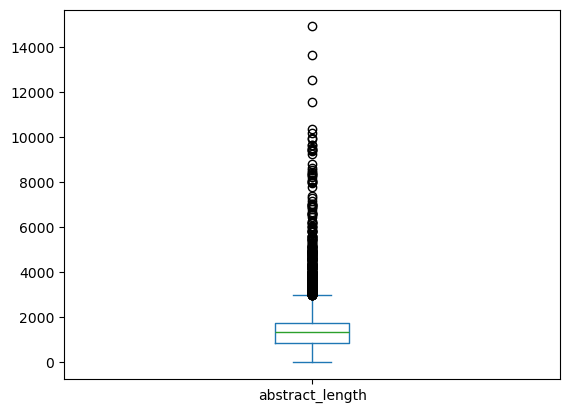

In [ ]:
df.abstract_length.plot(kind='box')
print(df.abstract_length.mean())

220.99526329639485


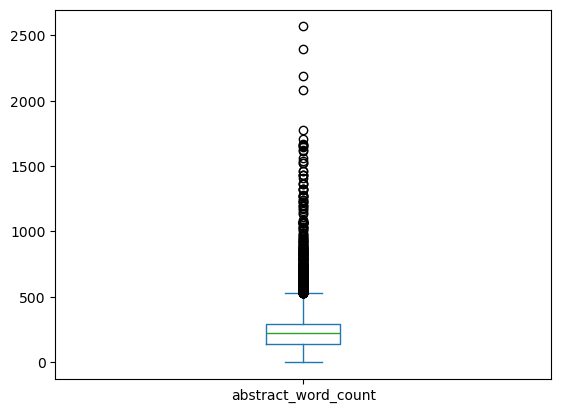

In [ ]:
df.abstract_word_count.plot(kind='box').plot()
print(df.abstract_word_count.mean())

9.18481915733458


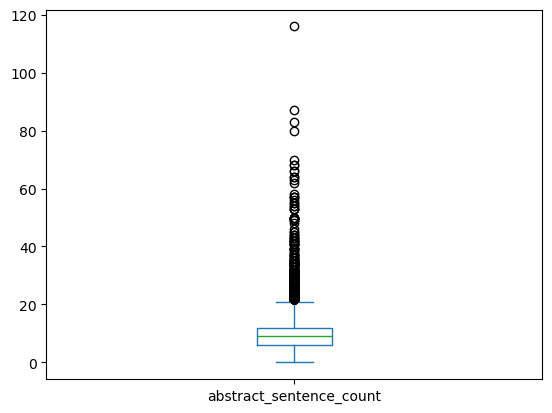

In [ ]:
df.abstract_sentence_count.plot(kind='box')
print(df.abstract_sentence_count.mean())

In [ ]:
#largest = df.sort('abstract_length', descending=True).head(20)
largest = df.sort_values('abstract_length', ascending=False).head(20)

# for article in largest.iter_rows(named=True):
#     print(article['title'])
#     print(f'abstract length: {article["abstract_length"]}')
#     print(article['abstract'])
#     print()

AttributeError: 'Series' object has no attribute 'max_len'